In [3]:
import numpy as np
from orphics import maps, cosmology,io,stats
from scipy import optimize
import szar
from szar import foregrounds
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from IPython.display import set_matplotlib_formats set_matplotlib_formats('retina')
csfont = {'fontname':'Latin Modern Roman'}
font = font_manager.FontProperties(family='Latin Modern Roman',style='normal', size = 8)
from cosmo_cleaner import fisher

In [4]:
l1c = cosmology.LimberCosmology(lmax=2000,pickling=True)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_2000_20210217.pkl
Loaded cached Cls from  output/clphi_low_acc_False_2000_20210217.txt
initializing power...
Initializing CMB window..


In [5]:
#specify the redshifts
z_edges = np.arange(0.,4.0,0.01)
zcents = (z_edges[1:]+z_edges[:-1])/2.
g1=np.zeros(len(zcents))
g2=np.zeros(len(zcents))
g3=np.zeros(len(zcents))

#g3 the external tracer. g1 the low z tracer
g1[zcents<0.3]=np.interp(zcents[zcents<0.3], l1c.zs, l1c.kernels['cmb']['W'])
g2=np.interp(zcents, l1c.zs, l1c.kernels['cmb']['W'])
g3[zcents>0.3]=np.interp(zcents[zcents>0.3], l1c.zs, l1c.kernels['cmb']['W'])

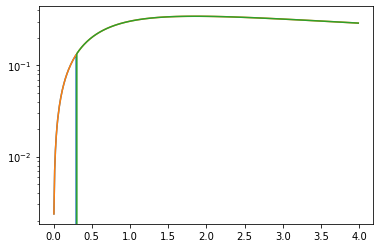

In [6]:
#plt.semilogy(zcents,g1)
plt.plot(zcents,g1,label='galaxy')
plt.semilogy(zcents,g2)
plt.semilogy(zcents,g3)

('Initializing galaxy window for ', 'g1', ' ...')
('Initializing galaxy window for ', 'g2', ' ...')
('Initializing galaxy window for ', 'g3', ' ...')


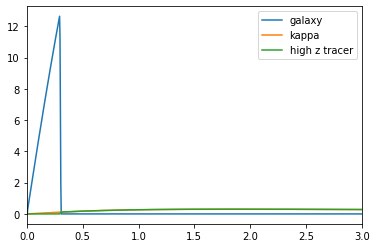

In [34]:

# Let's add this dndz to the cosmology object. By default, LimberCosmology doesn't allow you to reuse tag names, but here we force it to since this is a Python notebook!
l1c.addNz("g1",zcents,g1,bias=2,ignore_exists=True)
l1c.addNz("g2",zcents,g2,bias=1,ignore_exists=True)
l1c.addNz("g3",zcents,g3,bias=1,ignore_exists=True)

# and plot the resulting lensing kernel

plt.figure()
plt.plot(l1c.zs,l1c.kernels["g1"]['W'],label='galaxy')
#plt.plot(l1c.zs,l1c.kernels["g2"]['W'],label='g2')
plt.plot(l1c.zs,l1c.kernels["g2"]['W'],label='kappa')
#plt.plot(l1c.zs,l1c.kernels["g3"]['W'],label='high z tracer')
plt.plot(l1c.zs,l1c.kernels["g3"]['W'],label='high z tracer')

plt.legend()
plt.xlim(0,3)
plt.show()

In [35]:
ellrange = np.arange(1,1000)
l1c.generateCls(ellrange)
bias=2
omega_8=0.2
clkk = l1c.getCl("cmb","cmb") 
clgg = l1c.getCl("g1","g1") 
clcibcib = l1c.getCl("g3","g3") 
clkg = l1c.getCl("cmb","g1")
clcibg = l1c.getCl("g1","g3")
clcibk = l1c.getCl("cmb","g3")

clgg0=clgg/bias**2
clkg0=clkg/bias
clcibg0=clcibg/bias

In [36]:
compare_cleaning(clgg,clcibcib,clkk,clkg,clcibk,clcibg,bias,ellrange,cut=1000,fsky=1)

(1.1264812279681429,
 0.0014061868280401061,
 0.0013903463973920737,
 array([[0.7890984 ],
        [0.58237106],
        [0.4893756 ],
        [0.43293288],
        [0.39373338],
        [0.36432429],
        [0.34111956],
        [0.32215156],
        [0.30623355],
        [0.29260218],
        [0.28073912],
        [0.27027892],
        [0.26095482],
        [0.25256692],
        [0.24496207],
        [0.23802054],
        [0.23164718],
        [0.22576534],
        [0.22031242],
        [0.21523667],
        [0.21049498],
        [0.20605103],
        [0.20187402],
        [0.19793753],
        [0.19421888],
        [0.19069835],
        [0.18735874],
        [0.18418496],
        [0.18116373],
        [0.17828324],
        [0.17553299],
        [0.17290359],
        [0.17038656],
        [0.16797433],
        [0.16565998],
        [0.16343726],
        [0.16130045],
        [0.15924434],
        [0.15726414],
        [0.15535547],
        [0.15351425],
        [0.15173675],
       

Text(0.5, 0, 'Lcut used')

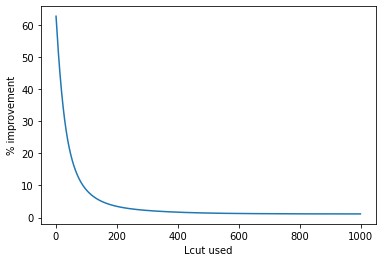

In [38]:
plt.plot(np.arange(1,1000),improvement)
plt.ylabel("% improvement")
plt.xlabel("Lcut used")

In [37]:
improvement=[]
old=[]
new=[]
for i in range(1,1000):
    error=compare_cleaning(clgg,clcibcib,clkk,clkg,clcibk,clcibg,bias,ellrange,cut=i,fsky=1)
    improvement.append(error[0])
    old.append(error[3])
    new.append(error[4])
    

Text(0.5, 1.0, 'error on b per L')

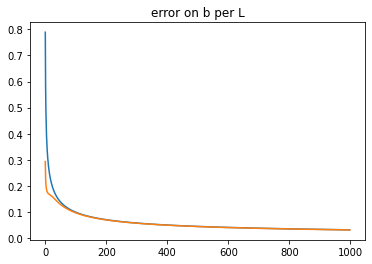

In [39]:
plt.plot(error[3].flatten())
plt.plot(error[4].flatten())
plt.title("error on b per L")

In [40]:
error=compare_cleaning(clgg,clcibcib,clkk,clkg,clcibk,clcibg,bias,ellrange,cut=1000,fsky=1)
error[3]

array([[0.7890984 ],
       [0.58237106],
       [0.4893756 ],
       [0.43293288],
       [0.39373338],
       [0.36432429],
       [0.34111956],
       [0.32215156],
       [0.30623355],
       [0.29260218],
       [0.28073912],
       [0.27027892],
       [0.26095482],
       [0.25256692],
       [0.24496207],
       [0.23802054],
       [0.23164718],
       [0.22576534],
       [0.22031242],
       [0.21523667],
       [0.21049498],
       [0.20605103],
       [0.20187402],
       [0.19793753],
       [0.19421888],
       [0.19069835],
       [0.18735874],
       [0.18418496],
       [0.18116373],
       [0.17828324],
       [0.17553299],
       [0.17290359],
       [0.17038656],
       [0.16797433],
       [0.16565998],
       [0.16343726],
       [0.16130045],
       [0.15924434],
       [0.15726414],
       [0.15535547],
       [0.15351425],
       [0.15173675],
       [0.15001949],
       [0.14835925],
       [0.14675307],
       [0.1451981 ],
       [0.14369178],
       [0.142

In [59]:
def get_corrcoef(clgg,clcibcib,clkk,clkg,clcibk,clcibg):
    rho={}
    rho_gk=np.sqrt(clkg**2/(clgg*clkk))
    rho_gcib=np.sqrt(clcibg**2/(clcibcib*clgg))
    rho_kcib=np.sqrt(clcibk**2/(clcibcib*clkk))
    rho['gk']=rho_gk
    rho['gcib']=rho_gcib
    rho['kcib']=rho_kcib
    return rho
    
    

In [30]:
corr=get_corrcoef(clgg,clcibcib,clkk,clkg,clcibk,clcibg)

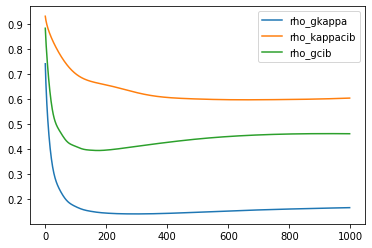

In [31]:
plt.plot(corr['gk'],label='rho_gkappa')
plt.plot(corr['kcib'],label='rho_kappacib')
plt.plot(corr['gcib'],label='rho_gcib')
#plt.hlines(1,0,1000)
plt.legend()

In [35]:
corrnew=get_corrcoef(clgg,clcibcib,clkk-clcibk**2/clcibcib,clkg,clcibk,clcibg)

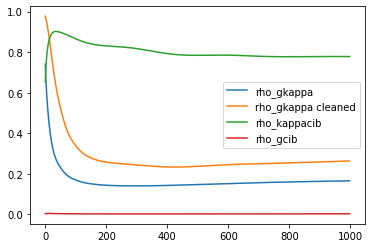

In [36]:
plt.plot(corr['gk'],label='rho_gkappa')
plt.plot(corrnew['gk'],label='rho_gkappa cleaned')
plt.plot(corr['kcib'],label='rho_kappacib')
plt.plot(corrnew['gcib'],label='rho_gcib')
plt.legend()

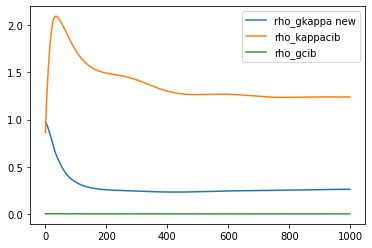

In [194]:
plt.plot(corrnew['gk'],label='rho_gkappa new')
plt.plot(corrnew['kcib'],label='rho_kappacib')
plt.plot(corrnew['gcib'],label='rho_gcib')

plt.legend()

In [10]:
def get_corrcoef(clgg,clcibcib,clkk,clkg,clcibk,clcibg):
    rho={}
    rho_gk=np.sqrt(clkg**2/(clgg*clkk))
    rho_gcib=np.sqrt(clcibg**2/(clcibcib*clgg))
    rho_kcib=np.sqrt(clcibk**2/(clcibcib*clkk))
    rho['gk']=rho_gk
    rho['gcib']=rho_gcib
    rho['kcib']=rho_kcib
    return rho
    

def compare_cleaning(clgg,clcibcib,clkk,clkg,clcibk,clcibg,bias,ellrange,cut=500,fsky=1):
    clgg0=clgg/bias**2
    clkg0=clkg/bias
    clcibg0=clcibg/bias
    ellrange=ellrange[:cut]

    #calculate the base error
    spectra = {'kg': clkg[:cut], 'gg' :clgg[:cut], 'kk': clkk[:cut]}
    pars = ['b']#, 's'
    Npars = len(pars)
    der_spectra_alpha = np.ones((len(clkg[:cut]), len(spectra), Npars))
    #Derivatives with respect to b
    der_spectra_alpha[:, 0, 0] = clkg0[:cut]
    der_spectra_alpha[:, 1, 0] = 2*bias*clgg0[:cut]
    der_spectra_alpha[:, 2, 0] = np.zeros((len(clkg[:cut])))
    
    a=Fisher(1,1,ellrange,spectra,der_spectra_alpha)
    old=a.get_fisher()[0] 
    oldf=a.error_per_mode_non_marginalized
    clkk_n=clkk-clcibk**2/clcibcib
    spectra = {'kg': clkg[:cut], 'gg' :clgg[:cut], 'kk': clkk_n[:cut]}
    der_spectra_alpha = np.ones((len(clkg[:cut]), len(spectra), Npars))
    #Derivatives with respect to b
    der_spectra_alpha[:, 0, 0] = clkg0[:cut]
    der_spectra_alpha[:, 1, 0] = 2*bias*clgg0[:cut]
    der_spectra_alpha[:, 2, 0] = np.zeros((len(clkg[:cut])))

    a=Fisher(1,1,ellrange,spectra,der_spectra_alpha)
    new=a.get_fisher()[0]
    newf=a.error_per_mode_non_marginalized
    #print(f'{100*(old-new)/old} % improvement with cleaning')
    return (100*(old-new)/old,old,new,oldf,newf)   

In [12]:
#create forecaster class

#receive spectra as a dict

class Fisher():
    def __init__(self, fsky,Npars, ells, spectra, der_spectra):
        self.spectra=spectra
        self.fsky=fsky
        self.der_spectra=der_spectra
        self.Npars=Npars
        self.ells=ells
        #function to get the number of modes
        
    def get_modes(self):
        
        deltaL=np.zeros(len(self.ells))
        deltaL[0]=self.ells[0]-0
        deltaL[1:]=self.ells[1:]-self.ells[:-1] 
        result = (2*self.ells*deltaL*self.fsky)
        return 1/result

    def get_Cl(self,X,Y):
        """X:g,k,i
           Y:g,k,i
        """
        if X+Y in self.spectra:
            Cl=self.spectra[X+Y]
        elif Y+X in self.spectra:
            Cl=self.spectra[Y+X]
        else:
            #field not present assume its zero and do not return error
            Cl=np.zeros(len(self.ells))
        return Cl

    def get_cov(self,X,Y,W,Z):
        return self.get_modes()*(self.get_Cl(X,W)*self.get_Cl(Y,Z)+self.get_Cl(X,Z)*self.get_Cl(Y,W))

    def get_covmat(self):
        self.covmat=np.zeros((len(self.ells),len(self.spectra),len(self.spectra)))
        self.cov_dict = {}
        for i in range(len(self.spectra)): 
            for j in range(len(self.spectra)):
                X,Y=list(self.spectra)[i]
                W,Z=list(self.spectra)[j]
                self.covmat[:,i,j]=self.get_cov(X,Y,W,Z)
                self.cov_dict[list(self.spectra)[i]+','+list(self.spectra)[j]]= self.get_cov(X,Y,W,Z)
        return self.covmat
    
    def get_fisher(self):
        
        #derivatives check shape (ells,len(spectra),len(pars))
        assert(self.der_spectra.shape[0] == len(self.ells)) 
        assert(self.der_spectra.shape[1] == len(self.spectra)) 
        assert(self.der_spectra.shape[2] == self.Npars)
        fisher_per_mode = np.einsum('...ik, ...ij, ...jm -> ...km',self.der_spectra, np.nan_to_num(np.linalg.inv(self.get_covmat())), self.der_spectra)
        self.fisher_per_mode=fisher_per_mode
        self.error_per_mode_non_marginalized = np.nan_to_num(np.diagonal(fisher_per_mode,axis1 = 1, axis2 = 2)**-0.5)
        
        self.fisher=np.sum(self.fisher_per_mode,axis=0)
        self.error_non_marginalized = np.diag(self.fisher)**-0.5 
        self.error_marginalized = np.linalg.inv(self.fisher)**0.5
        
        return self.error_marginalized[0]

In [41]:
#calculate the base error
cut=1000
spectra = {'kg': clkg[:cut], 'gg' :clgg[:cut], 'kk': clkk[:cut]}
pars = ['b']#, 's'
Npars = len(pars)
der_spectra_alpha = np.ones((len(clkg[:cut]), len(spectra), Npars))
#Derivatives with respect to b
der_spectra_alpha[:, 0, 0] = clkg0[:cut]
der_spectra_alpha[:, 1, 0] = 2*bias*clgg0[:cut]
der_spectra_alpha[:, 2, 0] = np.zeros((len(clkg[:cut])))

noclean=Fisher(1,1,ellrange,spectra,der_spectra_alpha)
old=noclean.get_fisher()[0] 
oldf=noclean.error_per_mode_non_marginalized
clkk_n=clkk-clcibk**2/clcibcib

errorgk=noclean.get_cov('g','k','g','k')
spectra = {'kg': clkg[:cut], 'gg' :clgg[:cut], 'kk': clkk_n[:cut]}
der_spectra_alpha = np.ones((len(clkg[:cut]), len(spectra), Npars))
#Derivatives with respect to b
der_spectra_alpha[:, 0, 0] = clkg0[:cut]
der_spectra_alpha[:, 1, 0] = 2*bias*clgg0[:cut]
der_spectra_alpha[:, 2, 0] = np.zeros((len(clkg[:cut])))

a=Fisher(1,1,ellrange,spectra,der_spectra_alpha)
errorgkclean=a.get_cov('g','k','g','k')


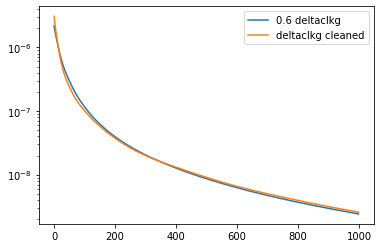

In [42]:
plt.semilogy(0.6*np.sqrt(errorgk),label='0.6 deltaclkg')
plt.semilogy(np.sqrt(errorgkclean),label='deltaclkg cleaned')
plt.legend()

In [19]:
clgg0=clgg/bias**2
clkg0=clkg/bias
clcibg0=clcibg/bias
ellrange=ellrange[:cut]

#calculate the base error
spectra = {'kg': clkg[:cut], 'gg' :clgg[:cut], 'kk': clkk[:cut]}
pars = ['b']#, 's'
Npars = len(pars)
der_spectra_alpha = np.ones((len(clkg[:cut]), len(spectra), Npars))
#Derivatives with respect to b
der_spectra_alpha[:, 0, 0] = clkg0[:cut]
der_spectra_alpha[:, 1, 0] = 2*bias*clgg0[:cut]
der_spectra_alpha[:, 2, 0] = np.zeros((len(clkg[:cut])))

a=Fisher(1,1,ellrange,spectra,der_spectra_alpha)

In [20]:
a.get_fisher()

array([0.00140124])

## more realistic model

In [146]:
def dndz_gauss(z,z0,sigma):
    ans = 1/np.sqrt(2*np.pi*sigma**2)* np.exp((-(z-z0)**2)/ (2.*sigma**2.))
 
    return ans 


In [150]:
z_edges = np.arange(0.,4.0,0.01)
zcents = (z_edges[1:]+z_edges[:-1])/2.
g1=0.5*dndz_gauss(zcents,0.4,0.2)
g1[zcents>1]=0.
g2=np.interp(zcents, l1c.zs, l1c.kernels['cmb']['W'])
g3=dndz_gauss(zcents,2,0.6)
g3[zcents<1]=0.

('Initializing galaxy window for ', 'g1', ' ...')
('Initializing galaxy window for ', 'g2', ' ...')
('Initializing galaxy window for ', 'g3', ' ...')


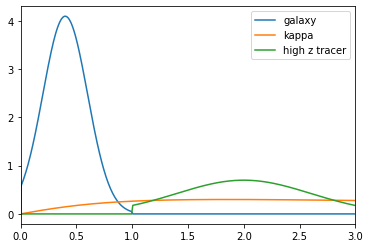

In [151]:

# Let's add this dndz to the cosmology object. By default, LimberCosmology doesn't allow you to reuse tag names, but here we force it to since this is a Python notebook!
l1c.addNz("g1",zcents,g1,bias=2,ignore_exists=True)
l1c.addNz("g2",zcents,g2,bias=1,ignore_exists=True)
l1c.addNz("g3",zcents,g3,bias=1,ignore_exists=True)

# and plot the resulting lensing kernel

plt.figure()
plt.plot(l1c.zs,l1c.kernels["g1"]['W'],label='galaxy')
#plt.plot(l1c.zs,l1c.kernels["g2"]['W'],label='g2')
plt.plot(l1c.zs,l1c.kernels["g2"]['W'],label='kappa')
#plt.plot(l1c.zs,l1c.kernels["g3"]['W'],label='high z tracer')
plt.plot(l1c.zs,l1c.kernels["g3"]['W'],label='high z tracer')

plt.legend()
plt.xlim(0,3)
plt.show()

In [152]:
ellrange = np.arange(1,1000)
l1c.generateCls(ellrange)
bias=2
clkk = l1c.getCl("cmb","cmb") 
clgg = l1c.getCl("g1","g1") 
clcibcib = l1c.getCl("g3","g3") 
clkg = l1c.getCl("cmb","g1")
clcibg = l1c.getCl("g1","g3")
clcibk = l1c.getCl("cmb","g3")

clgg0=clgg/bias**2
clkg0=clkg/bias
clcibg0=clcibg/bias

In [164]:
improvement=[]
old=[]
new=[]
for i in range(1,1000):
    error=compare_cleaning(clgg,clcibcib,clkk,clkg,clcibk,clcibg,bias,ellrange,cut=i,fsky=1)
    improvement.append(error[0])
    old.append(error[3])
    new.append(error[4])

Text(0.5, 0, 'Lcut used')

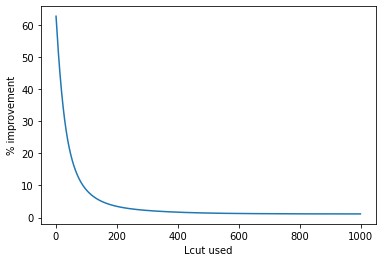

In [165]:
plt.plot(np.arange(1,1000),improvement)
plt.ylabel("% improvement")
plt.xlabel("Lcut used")

In [15]:
class Fisher():
    def __init__(self, fsky,Npars, ells, spectra, der_spectra):
        self.spectra=spectra
        self.fsky=fsky
        self.der_spectra=der_spectra
        self.Npars=Npars
        self.ells=ells
        #function to get the number of modes
        
    def get_modes(self):
        
        deltaL=np.zeros(len(self.ells))
        deltaL[0]=self.ells[0]-0
        deltaL[1:]=self.ells[1:]-self.ells[:-1] 
        result = (2*self.ells*deltaL*self.fsky)
        return 1/result

    def get_Cl(self,X,Y):
        """X:g,k,i
           Y:g,k,i
        """
        if X+Y in self.spectra:
            Cl=self.spectra[X+Y]
        elif Y+X in self.spectra:
            Cl=self.spectra[Y+X]
        else:
            #field not present assume its zero and do not return error
            Cl=np.zeros(len(self.ells))
        return Cl

    def get_cov(self,X,Y,W,Z):
        return self.get_modes()*(self.get_Cl(X,W)*self.get_Cl(Y,Z)+self.get_Cl(X,Z)*self.get_Cl(Y,W))

    def get_covmat(self):
        self.covmat=np.zeros((len(self.ells),len(self.spectra),len(self.spectra)))
        self.cov_dict = {}
        for i in range(len(self.spectra)): 
            for j in range(len(self.spectra)):
                X,Y=list(self.spectra)[i]
                W,Z=list(self.spectra)[j]
                self.covmat[:,i,j]=self.get_cov(X,Y,W,Z)
                self.cov_dict[list(spectra)[i]+','+list(spectra)[j]]= self.get_cov(X,Y,W,Z)
        return self.covmat
    
    def get_fisher(self):
        
        #derivatives check shape (ells,len(spectra),len(pars))
        assert(self.der_spectra.shape[0] == len(self.ells)) 
        assert(self.der_spectra.shape[1] == len(self.spectra)) 
        assert(self.der_spectra.shape[2] == self.Npars)
        fisher_per_mode = np.einsum('...ik, ...ij, ...jm -> ...km',self.der_spectra, np.nan_to_num(np.linalg.inv(self.get_covmat())), self.der_spectra)
        self.fisher_per_mode=fisher_per_mode
        self.error_per_mode_non_marginalized = np.nan_to_num(np.diagonal(fisher_per_mode,axis1 = 1, axis2 = 2)**-0.5)
        
        self.fisher=np.sum(self.fisher_per_mode,axis=0)
        self.error_non_marginalized = np.diag(self.fisher)**-0.5 
        self.error_marginalized = np.linalg.inv(self.fisher)**0.5
        
        return self.error_marginalized[0]
    